In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
train_knight_url = "../../subject/data04/Train_knight.csv"
test_knight_url = "../../subject/data04/Test_knight.csv"

train_knight_df = pd.read_csv(train_knight_url)
test_knight_df = pd.read_csv(test_knight_url)

train_knight_df.shape, test_knight_df.shape

((398, 31), (171, 30))

In [3]:
X = train_knight_df.drop(columns=["knight"])
y = train_knight_df["knight"]
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42, stratify=y)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (278, 30)
X_test shape: (120, 30)
y_train shape: (278,)
y_test shape: (120,)


In [4]:
f1_scores = []
for k in range(1, len(X.columns) + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)
    print(f'k={k}, {f1:.4f}')
# max(f1_scores)


k=1, 0.9066
k=2, 0.9256
k=3, 0.9248
k=4, 0.9088
k=5, 0.9251
k=6, 0.9254
k=7, 0.9500
k=8, 0.9418
k=9, 0.9498
k=10, 0.9498
k=11, 0.9498
k=12, 0.9498
k=13, 0.9498
k=14, 0.9498
k=15, 0.9327
k=16, 0.9163
k=17, 0.9327
k=18, 0.9330
k=19, 0.9413
k=20, 0.9498
k=21, 0.9413
k=22, 0.9330
k=23, 0.9413
k=24, 0.9498
k=25, 0.9498
k=26, 0.9498
k=27, 0.9409
k=28, 0.9409
k=29, 0.9409
k=30, 0.9409


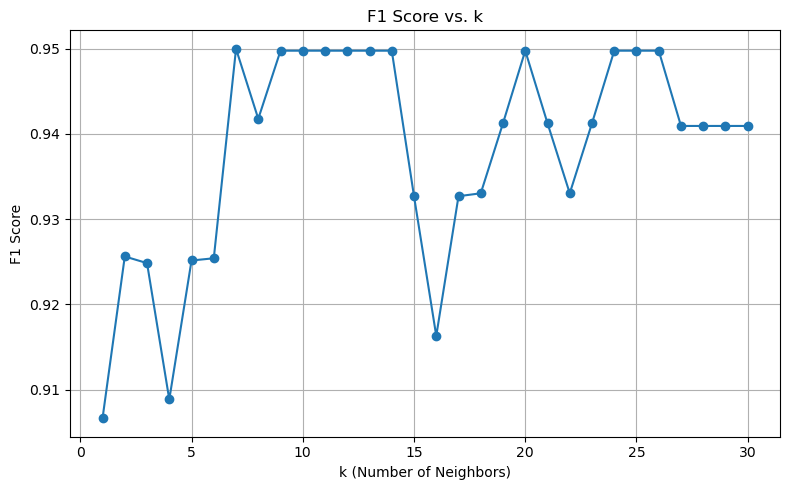

In [5]:
# Plotting feature importance
# --- Plot k vs F1-score ---
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(X.columns) + 1), f1_scores, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. k")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# best k=7, 0.9500
# retrain with best k
knn_best = KNeighborsClassifier(n_neighbors=7)
knn_best.fit(X_train, y_train)
knn_best.score(X_train, y_train), knn_best.score(X_test, y_test)

(0.9460431654676259, 0.95)

In [7]:
# Confusion Matrix
y_pred_best = knn_best.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_best))
print(metrics.classification_report(y_test, y_pred_best))

[[43  3]
 [ 3 71]]
              precision    recall  f1-score   support

        Jedi       0.93      0.93      0.93        46
        Sith       0.96      0.96      0.96        74

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [8]:
y_pred = knn_best.predict(test_knight_df)
# --- Export to KNN.txt ---
import os
filename = os.path.join(os.getcwd(), 'KNN.txt')

with open(filename, "w") as f:
    for k in y_pred:
        f.write(k + "\n")